# Capstone：OurBank Churn
OurBank is an Australian retail bank that ofers customers a range of products and services,
including loans, credit cards, transaction and savings accounts. It has one of the largest branch
and ATM networks, and prides itself on being a bank that consumers can trust.
OurBank ofers four types of credit cards, ranging in the services provided with each product.
These are ranked from heir most basic Blue, to Silver, Gold and fnally to their most expensive
and high-touch Platinum product.

## Problem statement

OurBank’s consumer credit card business manager is concerned about their customer attrition:
Customers keep moving to other banks and leaving OurBank in their dust. This is a big problem,
because they know it costs a lot more money to get new customers than it does to retain existing
customers.

They want to analyse the data to fnd out the reason behind this, predict future customers who
might leave, and to determine whether or not there are strategies they can use to encourage
existing customers to stay. They also want to know if they can improve the data they collect in
any way.


## Data Dictionary

| Column name| Definition|
| ---- | ----- |
| CLIENTNUM | Client number - Unique identifier for the customer holding the account|
|Attrition_Flag |Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age  | Customer's Age in Years |
|Gender |M=Male, F=Female |
|Dependent_count | Number of dependents |
|Education_Level | Educational Qualification of the account holder (example: high school, college graduate, etc.) |
|Marital_status | Married, Single, Divorced, Unknown|
|Income _Category | Annual Income Category of the account holder
|Card_Category | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Months_On_Book  | Period of relationship with bank|
|Total_Relationship_Count | Total no. of products held by the customer|
|Months_Inactive_12_mon | No. of months inactive in the last 12 months|
|Contacts_Count_12_mon |No. of Contacts in the last 12 months|
|Credit_Limit |Credit Limit on the Credit Card|
|Total_Revolving_Bal | Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months)|
|Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1)|
|Total_Trans_Amt | Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct |Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1 |Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio | Average Card Utilization Ratio|

### Step 1: Reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
OurBank = pd.read_csv('Our Bank customer data.csv')

### Step 2: Explore the data

In [3]:
OurBank.shape

(10127, 22)

In [4]:
OurBank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [5]:
OurBank.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
dtype: object

In [6]:
OurBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
OurBank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [8]:
OurBank.groupby(['Attrition_Flag']).describe()

CLIENTNUM                                           \
                      count          mean           std          min   
Attrition_Flag                                                         
Attrited Customer    1627.0  7.352614e+08  3.557725e+07  708083283.0   
Existing Customer    8500.0  7.399272e+08  3.710723e+07  708082083.0   

                                                                        \
                           25%          50%           75%          max   
Attrition_Flag                                                           
Attrited Customer  712371258.0  716564433.0  7.683737e+08  828294933.0   
Existing Customer  713219658.0  718164333.0  7.783415e+08  828343083.0   

                  Customer_Age             ... Avg_Utilization_Ratio         \
                         count       mean  ...                   75%    max   
Attrition_Flag                             ...                                
Attrited Customer       1627.0  46.659496  ...               0.23100  0.999   
Existing Customer       8500.0  46.262118  ...               0.52925  0.994   

                  Unnamed: 21                               
                        count mean std min 25% 50% 75% max  
Attrition_Flag                                              
Attrited Customer         0.0  NaN NaN NaN NaN NaN NaN NaN  
Existing Customer         0.0  NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 128 columns]

### Step 3: Cleaning the data

In [9]:
# Check columns list and missing values
OurBank.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [10]:
# Delete the Unnames column
del OurBank['Unnamed: 21']

In [11]:
# Double Check
OurBank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
# Check if duplicated in CLIENTNUM
OurBank[OurBank.duplicated('CLIENTNUM')]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


### Step 4:Exploratory Data Analysis

In [13]:
# Calculate churn rate form attrition flag
OurBank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

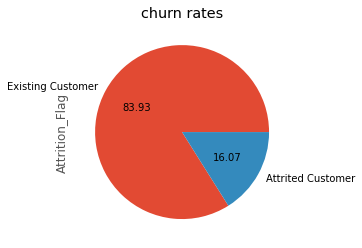

In [14]:
OurBank["Attrition_Flag"].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('churn rates')
plt.show()

#### We can that baseline churn rate is 16.07%

<AxesSubplot:ylabel='Frequency'>

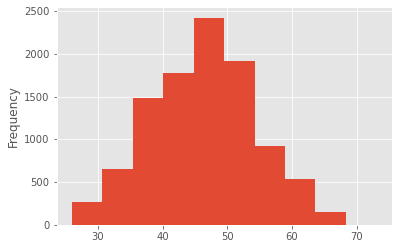

In [15]:
# Create a histogram of the age column.
OurBank.Customer_Age.plot(kind='hist')

#### We can see that the age group is concentrated between 45-50 years old

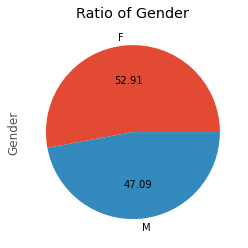

In [16]:
# Let's see if any different in Gender column.
OurBank["Gender"].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Ratio of Gender')
plt.show()

#### Female credit card users more than male,make sense!

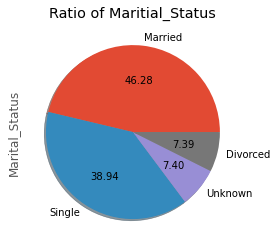

In [17]:
# Let's see the Marital_Status column.
OurBank["Marital_Status"].value_counts().plot(kind='pie',shadow=True,autopct='%.2f')
plt.title('Ratio of Maritial_Status')
plt.show()

#### Married people use the credit card more than single people

Text(0.5, 1.0, 'Frequency of Education')

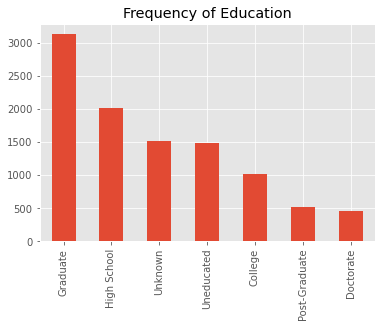

In [18]:
# Let's see the Education column.
OurBank['Education_Level'].value_counts().plot(kind='bar')
plt.title('Frequency of Education')

#### Graduate and High school! 

#### Female credit card users more than male,make sense!

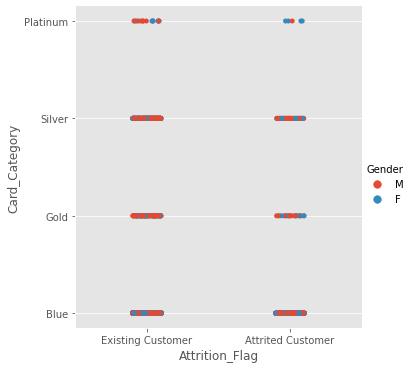

In [19]:
# Catpolt using seaborn lib
sns.catplot(x='Attrition_Flag', y='Card_Category', hue='Gender', 
            data=OurBank);

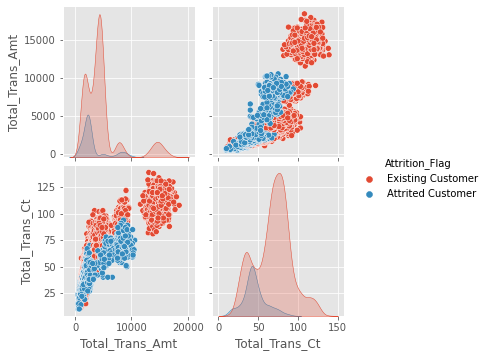

In [20]:
sns.pairplot(OurBank, vars=['Total_Trans_Amt','Total_Trans_Ct'], hue='Attrition_Flag', height=2.5)

#### We can see that customer who churned from credit card service, had less transaction count and transaction amount

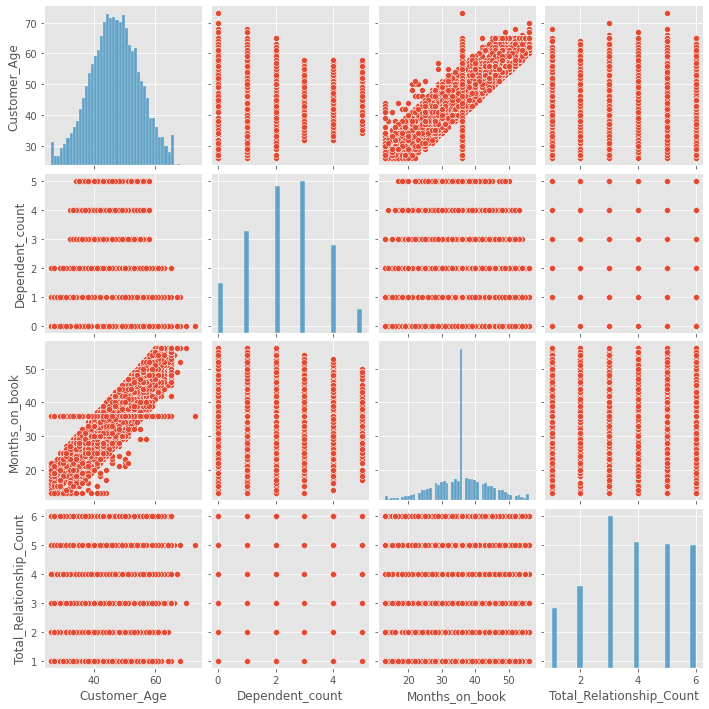

In [21]:
# Pairplot using seaborn lib
sns.pairplot(OurBank[['Customer_Age','Dependent_count','Months_on_book', 'Total_Relationship_Count']])

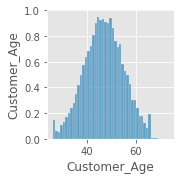

In [22]:
# Pairplot using seaborn lib
sns.pairplot(OurBank[['Customer_Age','Gender','Education_Level', 'Marital_Status', 'Income_Category']])

### Step 5: Check Correlation between variables

In [23]:
# Encoding categorical columns
OurBank['Attrition_Flag']=OurBank['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
OurBank['Gender']=OurBank['Gender'].replace({'M':0,'F':1})
OurBank['Education_Level']=OurBank['Education_Level'].replace({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5, 'Unknown':6})
OurBank['Marital_Status']=OurBank['Marital_Status'].replace({'Single':0, 'Married':1, 'Divorced':2, 'Unknown':3})
OurBank['Income_Category']=OurBank['Income_Category'].replace({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5})
OurBank['Card_Category']=OurBank['Card_Category'].replace({'Blue': 0, 'Silver':1,'Gold':2,'Platinum':3})

In [24]:
# Verifying dtypes
OurBank.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Text(0.5, 1.0, 'Correlation between variables')

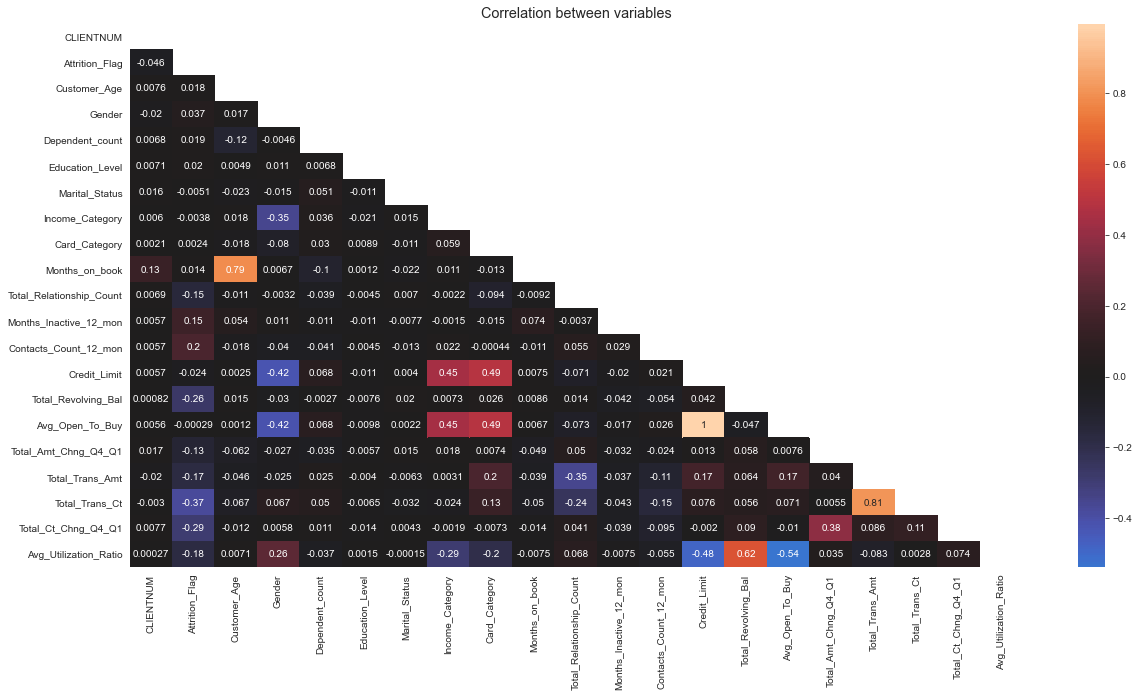

In [25]:
# Check Correlation between variables
sns.set_style('whitegrid')
plt.subplots(figsize=(20,10))
mask = np.zeros_like(OurBank.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(OurBank.corr(),annot=True, mask=mask, center = 0)
plt.title('Correlation between variables')


#### We can see that the following three sets of data have a strong correlation
`Credit_Limit` and `Avg_Open_To_Buy`
`Total_Trans_Amt` and `Total_Trans_Ct`
`Customer_Age` and `Months_on_book`

In [26]:
# Find most important features relative to target
corr = OurBank.select_dtypes(include=[np.number]).corr()
print (corr['Attrition_Flag'].sort_values(ascending=False))

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Gender                      0.037272
Education_Level             0.019545
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Card_Category               0.002354
Avg_Open_To_Buy            -0.000285
Income_Category            -0.003819
Marital_Status             -0.005146
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64


In [27]:
# Find most important features relative to target
corr = OurBank.select_dtypes(include=[np.number]).corr()
print (corr['Attrition_Flag'].sort_values(ascending=False)[:5], '\n')
print (corr['Attrition_Flag'].sort_values(ascending=False)[-5:])

Attrition_Flag            1.000000
Contacts_Count_12_mon     0.204491
Months_Inactive_12_mon    0.152449
Gender                    0.037272
Education_Level           0.019545
Name: Attrition_Flag, dtype: float64 

Total_Trans_Amt         -0.168598
Avg_Utilization_Ratio   -0.178410
Total_Revolving_Bal     -0.263053
Total_Ct_Chng_Q4_Q1     -0.290054
Total_Trans_Ct          -0.371403
Name: Attrition_Flag, dtype: float64


#### We can see that the Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio have more correlation with attrition_flag.

## Step 6: Churn Prediction Model

In [28]:
# get dummies before 
OurBank_df=OurBank.copy()
OurBank_df.info()
OurBank_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,3,0,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,1,3,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
#get dummies after
OurBank_df=pd.get_dummies(data=OurBank, columns=['Gender', 'Education_Level', 'Marital_Status', 
                                                 'Income_Category','Card_Category'], drop_first=True)

OurBank_df.info()
OurBank_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Months_on_book            10127 non-null  int64  
 5   Total_Relationship_Count  10127 non-null  int64  
 6   Months_Inactive_12_mon    10127 non-null  int64  
 7   Contacts_Count_12_mon     10127 non-null  int64  
 8   Credit_Limit              10127 non-null  float64
 9   Total_Revolving_Bal       10127 non-null  int64  
 10  Avg_Open_To_Buy           10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 12  Total_Trans_Amt           10127 non-null  int64  
 13  Total_Trans_Ct            10127 non-null  int64  
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_2,Marital_Status_3,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5,Card_Category_1,Card_Category_2,Card_Category_3
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,0,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,0,0,0,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,1,0,0,0,0,0,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Data Partition
OurBank_train = OurBank_df

In [31]:
# Remove the columns with very low correlation:'CLIENTNUM', 'Avg_Open_To_Buy'
OurBank_train = OurBank_train.drop(columns=['CLIENTNUM','Avg_Open_To_Buy'])

In [32]:
# Double Check
OurBank_train.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_1',
       'Education_Level_1', 'Education_Level_2', 'Education_Level_3',
       'Education_Level_4', 'Education_Level_5', 'Education_Level_6',
       'Marital_Status_1', 'Marital_Status_2', 'Marital_Status_3',
       'Income_Category_1', 'Income_Category_2', 'Income_Category_3',
       'Income_Category_4', 'Income_Category_5', 'Card_Category_1',
       'Card_Category_2', 'Card_Category_3'],
      dtype='object')

#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [34]:
# set x and y
X = OurBank_train.drop('Attrition_Flag', axis = 1)
y = OurBank_train['Attrition_Flag']

# train test split
# stratify=y preserve the proportion of target as in orginal dataset in the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

# set the model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

C:\Users\zitin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')

Total # of sample in whole dataset: 10127
Total # of sample in train dataset: 7595


In [36]:
# Baseline accuracy = proportion of the majority class
print('Baseline Accuracy: ',1. - y_train.mean())
print('Train Accuracy :',logreg.score(X_train, y_train))
print('Test Accuracy: ',logreg.score(X_test, y_test))

Baseline Accuracy:  0.8393680052666228
Train Accuracy : 0.8775510204081632
Test Accuracy:  0.8834913112164297


In [37]:
# confusion matrix
predict = logreg.predict(X_test)

In [38]:
print(predict)

[1 0 0 ... 0 0 1]


In [39]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2125
           1       0.72      0.45      0.55       407

    accuracy                           0.88      2532
   macro avg       0.81      0.71      0.74      2532
weighted avg       0.87      0.88      0.87      2532



#### Thanks!